# Introduction to Customer Churn Prediction Project

## Problem Statement
In the competitive landscape of ecommerce, retaining customers is as crucial as acquiring new ones. This project aims to address the concern of customer churn - a scenario where customers stop doing business with a company. The core objective is to build a predictive model that can identify customers at a high risk of churning from an ecommerce company. Identifying such customers early on allows companies to implement strategic measures to improve customer retention.

## Data Overview
The project will utilize a dataset containing various customer profiles. This data encompasses demographics, a churn flag (where 1 signifies churned customers), and their purchase history. The dataset is provided in an Excel file named **"BA - Assignment Part 1 data set.xlsx"** and is accessible through the following link: [Dataset](https://docs.google.com/spreadsheets/d/1rjShyhhVANI55pgPVlOW_VlRIJTCLKAp/edit?usp=sharing&ouid=106087074927700462717&rtpof=true&sd=true).


## Objective
By accurately predicting customer churn, the ecommerce company can take targeted actions to retain valuable customers, thus enhancing customer loyalty and contributing to long-term success.

This project aims not only to predict churn with high accuracy but also to understand the underlying causes of churn, enabling the implementation of effective retention strategies.

# Setting Up Environment for Data Analysis and Machine Learning

## Introduction
The following code block is designed to set up the Python environment for data analysis and machine learning tasks. It includes importing necessary libraries, adjusting aesthetics for plots, configuring the Jupyter Notebook theme for better visual interpretation, and importing machine learning algorithms and metrics.

## Steps and Configurations

1. **Import Libraries:** Essential libraries like Pandas, NumPy, Seaborn, and Matplotlib are imported for data manipulation, statistical calculations, and visualization.

2. **Visualization Setup:**
    - **Font Size:** The font size for plots is set to 14 for clear readability.
    - **Jupyter Theme:** The `grade3` theme from `jupyterthemes` is applied with grid disabled for a cleaner visual style.
    - **Seaborn Style:** The seaborn style is set to `white` with additional grid style adjustments to maintain visual consistency and readability.

3. **Machine Learning Libraries:**
    - **scikit-learn:** Import machine learning models such as Logistic Regression, Decision Tree, and Random Forest Classifiers along with functions for train-test split and evaluation metrics.
    - **SMOTE:** The SMOTE (Synthetic Minority Over-sampling Technique) for addressing class imbalance.

4. **Warning Suppression:** Warnings are ignored to ensure a clean output, focusing on the results rather than intermediary computation warnings.

## Objectives
This setup is crucial for performing data analysis effectively and applying machine learning algorithms efficiently. It ensures that:
- Data visualization is consistent, aesthetically pleasing, and informative.
- The environment supports the implementation and evaluation of various machine learning models.
- Class imbalance in datasets can be handled, providing a more accurate performance evaluation.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set font size
plt.rc("font", size=14)

# Apply Jupyter theme for visual style
from jupyterthemes import jtplot
jtplot.style(theme='grade3', grid=False)

# Set seaborn style
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Import necessary libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import warnings

# Ignore warnings for cleaner output
warnings.filterwarnings("ignore")

In [2]:
# Load the data from an Excel file named "BA - Assignment Part 1 data set.xlsx" and read the sheet named "E Comm"
data = pd.read_excel("BA - Assignment Part 1 data set.xlsx", "E Comm")

In [3]:
# Display the first few rows of the DataFrame to get an overview of the data
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
# Split the dataset into two subsets based on the 'Churn' variable
# 'retained' contains observations where 'Churn' is 0 (indicating customers who were retained)
# 'left' contains observations where 'Churn' is 1 (indicating customers who left)
retained = data[data.Churn == 0]
left = data[data.Churn == 1]

# Print the shape of each subset to show the number of observations in each category
print("Retained customers shape:", retained.shape)
print("Left customers shape:", left.shape)

Retained customers shape: (4682, 20)
Left customers shape: (948, 20)


In [5]:
# Print the data types of each column in the DataFrame
data.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [6]:
pd.DataFrame(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

""


In [7]:
data.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [8]:
# Group the data by the 'Churn' variable and calculate the mean of numeric columns
# 'numeric_only=True' ensures that only numeric columns are included in the calculation
data.groupby('Churn').mean(numeric_only=True)

,CustomerID,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
Churn,,,,,,,,,,,,,,
0,52829.455575,11.502334,1.619821,15.353931,2.925530,3.639257,3.001282,4.162965,0.234088,15.724893,1.758232,3.046601,4.807406,180.635203
1,52746.575949,3.379469,1.827004,17.134259,2.961798,3.934599,3.390295,4.466245,0.535865,15.627409,1.717021,2.823656,3.236018,160.370928


# Insights from Customer Behavior Data

## Analysis Summary

### Distance from Warehouse to Home
- **Retained vs Churned Customers:** The data suggests that the average distance from the warehouse to the home is lower for retained customers, with a value of 15.35, in contrast to churned customers, where the average is at 17.31. This indicates that customers living closer to the warehouse tend to remain with the service more often than those living further away.

### Incidence of Complaints
- **Retained vs Churned Customers:** The frequency of complaints also presents a notable difference between retained and churned customers. Retained customers have a lower complaint rate at 0.234088, while churned customers have a significantly higher rate at 0.535865. This underscores the impact of customer satisfaction and service quality on retention.

## Concluding Remarks
The insights underscore the importance of logistical efficiency and customer service in retaining customers. Proximity to the warehouse and a lower incidence of complaints are associated with higher retention rates, highlighting potential areas for business improvement and strategy adjustment.

In [9]:
# Calculate the correlation matrix of numerical columns in the 'data' DataFrame
column_correlation = data.corr(numeric_only=True)

# Extract the correlation of the 'Churn' column with other columns
churn_correlation = column_correlation['Churn']

**To confirm if the data has not any duplicate customer IDs**

In [10]:
data.columns.tolist()

['CustomerID',
 'Churn',
 'Tenure',
 'PreferredLoginDevice',
 'CityTier',
 'WarehouseToHome',
 'PreferredPaymentMode',
 'Gender',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'PreferedOrderCat',
 'SatisfactionScore',
 'MaritalStatus',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [11]:
data.dtypes[data.dtypes!='object'].index.tolist()

['CustomerID',
 'Churn',
 'Tenure',
 'CityTier',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [12]:
data.dtypes[data.dtypes=='object'].index.tolist()

['PreferredLoginDevice',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus']

In [13]:
data['CustomerID'].duplicated().sum() 

0

**This function returns distinct values of the given column (arguement - 'col') of dataframe data**

In [14]:
data.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

In [15]:
print('')
for col in [
 'PreferredLoginDevice',
 'CityTier',
 'PreferredPaymentMode',
 'Gender',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'PreferedOrderCat',
 'SatisfactionScore',
 'MaritalStatus',
 'Complain']:
    col_vals =', '.join(str(x) for x in data[col].unique().tolist())
    print(f'\033[1m{col}\033[0m : {col_vals} \n')
    


PreferredLoginDevice : Mobile Phone, Phone, Computer 

CityTier : 3, 1, 2 

PreferredPaymentMode : Debit Card, UPI, CC, Cash on Delivery, E wallet, COD, Credit Card 

Gender : Female, Male 

HourSpendOnApp : 3.0, 2.0, nan, 1.0, 0.0, 4.0, 5.0 

NumberOfDeviceRegistered : 3, 4, 5, 2, 1, 6 

PreferedOrderCat : Laptop & Accessory, Mobile, Mobile Phone, Others, Fashion, Grocery 

SatisfactionScore : 2, 3, 5, 4, 1 

MaritalStatus : Single, Divorced, Married 

Complain : 1, 0 



# Data Cleaning Suggestions

## Column Adjustments for Consistency

### Preferred Login Device
- **Merge Categories:** The `Phone` & `Mobile Phone` entries in `PreferredLoginDevice` are essentially referring to the same mode of access. It is recommended to consolidate these entries under a single category, perhaps `Mobile Phone`, for clarity and correctness.

### Preferred Payment Mode
- **Clarification of Abbreviations:** In the `PreferredPaymentMode` column, the abbreviations `CC` & `COD` stand for `Credit Card` & `Cash on Delivery` respectively. To enhance readability and eliminate ambiguity, it is advised to map `CC` to `Credit Card` and `COD` to `Cash on Delivery`, standardizing the dataset.

### Preferred Order Category
- **Category Unification:** The `Mobile` & `Mobile Phone` designations within the `PreferredOrderCategory` column are duplicates, representing the same category choice. Merging these into one, unified category (suggested name: `Mobile Phone`) would streamline data interpretation and analysis.

## Conclusion
Implementing these adjustments will contribute to a cleaner, more coherent dataset, facilitating more accurate analysis and reporting. Consistency in data representation is key to effective data science practices.

### Fixing values of those columns having same values with different names

In [16]:
# Replace 'Mobile Phone' and 'Phone' with 'Mobile' in the 'PreferredLoginDevice' column
data['PreferredLoginDevice'] = data['PreferredLoginDevice'].replace(['Mobile Phone', 'Phone'], 'Mobile')

# Replace 'CC' with 'Credit Card' and 'COD' with 'Cash on Delivery' in the 'PreferredPaymentMode' column
data['PreferredPaymentMode'] = data['PreferredPaymentMode'].replace({'CC': 'Credit Card', 'COD': 'Cash on Delivery'})

# Replace 'Mobile' with 'Mobile Phone' in the 'PreferedOrderCat' column
data['PreferedOrderCat'] = data['PreferedOrderCat'].replace('Mobile', 'Mobile Phone')


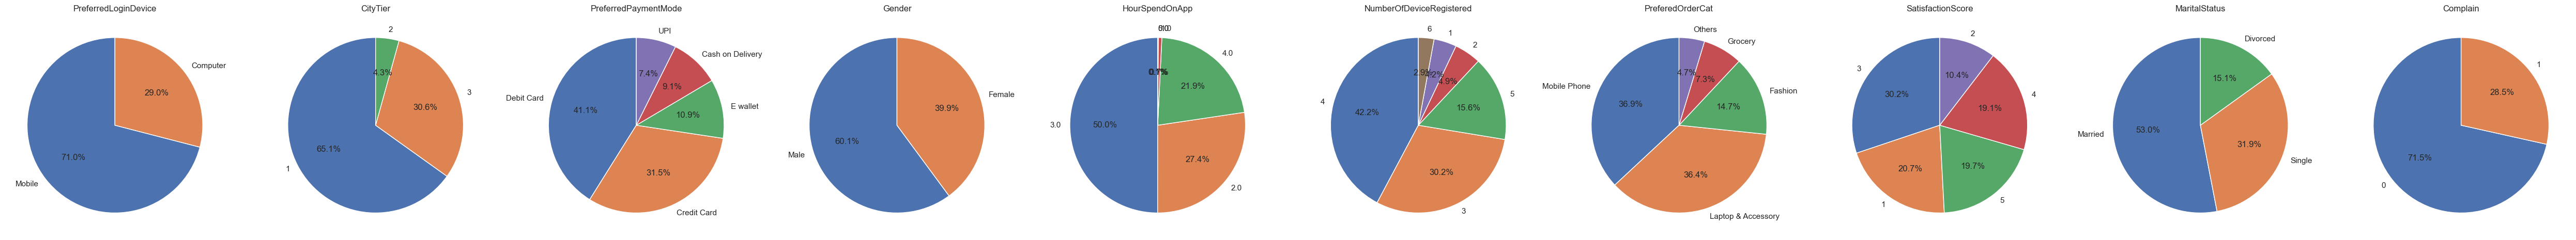

In [17]:
# Setting up the figure for multiple pie charts
df = data[['PreferredLoginDevice',
 'CityTier',
 'PreferredPaymentMode',
 'Gender',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'PreferedOrderCat',
 'SatisfactionScore',
 'MaritalStatus',
 'Complain']]
num_columns = len(df.columns)
fig, axes = plt.subplots(1, num_columns, figsize=(5*num_columns, 6))  # Adjust figsize as necessary

for i, column in enumerate(df.columns):
    counts = df[column].value_counts()  # Count the occurrences of each category
    ax = axes[i]  # Select the subplot to draw the pie chart
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(column)  # Setting the title of the pie chart to the column name

plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()

# Customer Behaviour Insights from Pie Charts

## Insights Overview

The analysis below highlights several key insights derived from pie chart visualizations, presenting behaviors and preferences of users in terms of login device, city tier, payment mode, gender, app usage, device registration, order categories, satisfaction scores, marital status, and complaint registration.

### 1. Preferred Login Device
- **Mobile Device:** A significant majority, 71.0%, prefer using a mobile device to log in.
- **Computer:** 29.0% prefer using a computer.

### 2. City Tier
- **City Tier 1:** The majority, 65.1%, are from City Tier 1.
- **City Tier 3:** 30.6% are from City Tier 3.
- **City Tier 2:** A smaller percentage, 4.3%, are from City Tier 2.

### 3. Preferred Payment Mode
- **Debit Card:** Most preferred payment mode at 41.1%.
- **Credit Card:** Follows closely at 31.5%.
- **Cash on Delivery:** Preferred by 10.9%.
- **E-wallet:** Chosen by 9.1%.
- **UPI:** The least preferred, at 7.4%.

### 4. Gender
- **Male:** 60.1% of the users are male.
- **Female:** 39.9% are female.

### 5. Hours Spent on App
- **3 Hours:** Half of the users, 50.0%, spend 3 hours on the app.
- **2 Hours:** About 27.4% spend 2 hours.
- **4 Hours:** 21.9% spend 4 hours.
- **6 Hours:** A negligible amount, 0.1%, spend 6 hours.

### 6. Number of Devices Registered
- **4 Devices:** Largest fraction, 42.2%, have 4 devices registered.
- **3 Devices:** Followed by 30.2% with 3 devices.
- **5 Devices:** 15.6% have 5 devices registered.
- Others follow with lower percentages.

### 7. Preferred Order Category
- **Mobile Phone & Laptop & Accessory:** Equally preferred at 36.9% and 36.4% respectively.
- **Fashion:** Followed by 14.7%.
- **Grocery:** Preferred by 7.3%.
- **Others:** At 4.7%.

### 8. Satisfaction Score
- **Score 3:** Highest frequency at 30.2%.
- **Score 4 & 5:** Indicating higher satisfaction at 19.1% and 19.7% respectively.
- **Scores 1 & 2:** Have lower frequencies, contributing to 20.7% and 10.4%.

### 9. Marital Status
- **Married:** Over half, 53.0%, are married.
- **Single:** 31.9% are single.
- **Divorced:** A smaller proportion, 15.1%.

### 10. Complain
- **No Complaint:** A majority, 71.5%, did not register a complaint.
- **Complaint Registered:** 28.5% did.

## Conclusion
The data insights reveal nuanced behaviors and preferences related to device usage, geographic distribution, payment methods, engagement time, order preferences, satisfaction levels, and feedback mechanisms among the dataset's users.

## Machine Learining

In [18]:
data_ml=data.copy()
data_ml.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [19]:
data_ml.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [20]:
for column in data_ml.columns:
    # Check if the column is numerical (e.g., int64, float64)
    if data_ml[column].dtype in ['int64', 'float64']:
        # Calculate the median without the missing values
        median_value = data_ml[column].median()
        
        # Impute missing values with the median
        data_ml[column].fillna(median_value, inplace=True)


In [21]:
data_ml.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [22]:
# Select only numeric columns
numeric_data = data_ml.select_dtypes(include='number')
numeric_data.drop(['CustomerID','Churn'], axis=1,inplace=True)
numeric_data.corr()

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
Tenure,1.000000,-0.057895,-0.012191,-0.017282,-0.020657,-0.014452,0.235076,-0.020535,-0.005542,0.101535,0.165339,0.174378,0.467986
CityTier,-0.057895,1.000000,0.013576,-0.009921,0.027934,-0.011554,-0.029440,0.003375,-0.028890,0.022629,0.033551,0.010214,0.055746
WarehouseToHome,-0.012191,0.013576,1.000000,0.064069,0.023020,0.007524,-0.008305,0.026825,0.038311,0.002675,0.000354,0.020253,0.000415
HourSpendOnApp,-0.017282,-0.009921,0.064069,1.000000,0.305048,0.030937,0.139541,0.006607,0.099305,0.187166,0.102053,0.061213,0.114286
NumberOfDeviceRegistered,-0.020657,0.027934,0.023020,0.305048,1.000000,-0.017228,0.084997,0.003407,0.065714,0.152065,0.099790,0.007350,0.137183
SatisfactionScore,-0.014452,-0.011554,0.007524,0.030937,-0.017228,1.000000,0.053583,-0.031115,-0.027121,0.017423,0.018166,0.031985,0.003473
NumberOfAddress,0.235076,-0.029440,-0.008305,0.139541,0.084997,0.053583,1.000000,-0.026399,0.012161,0.036985,-0.013970,-0.067180,0.186688
Complain,-0.020535,0.003375,0.026825,0.006607,0.003407,-0.031115,-0.026399,1.000000,-0.003842,-0.007810,-0.021288,-0.041415,0.000525
OrderAmountHikeFromlastYear,-0.005542,-0.028890,0.038311,0.099305,0.065714,-0.027121,0.012161,-0.003842,1.000000,0.024482,0.010567,-0.004621,-0.009620
CouponUsed,0.101535,0.022629,0.002675,0.187166,0.152065,0.017423,0.036985,-0.007810,0.024482,1.000000,0.641178,0.296816,0.219394


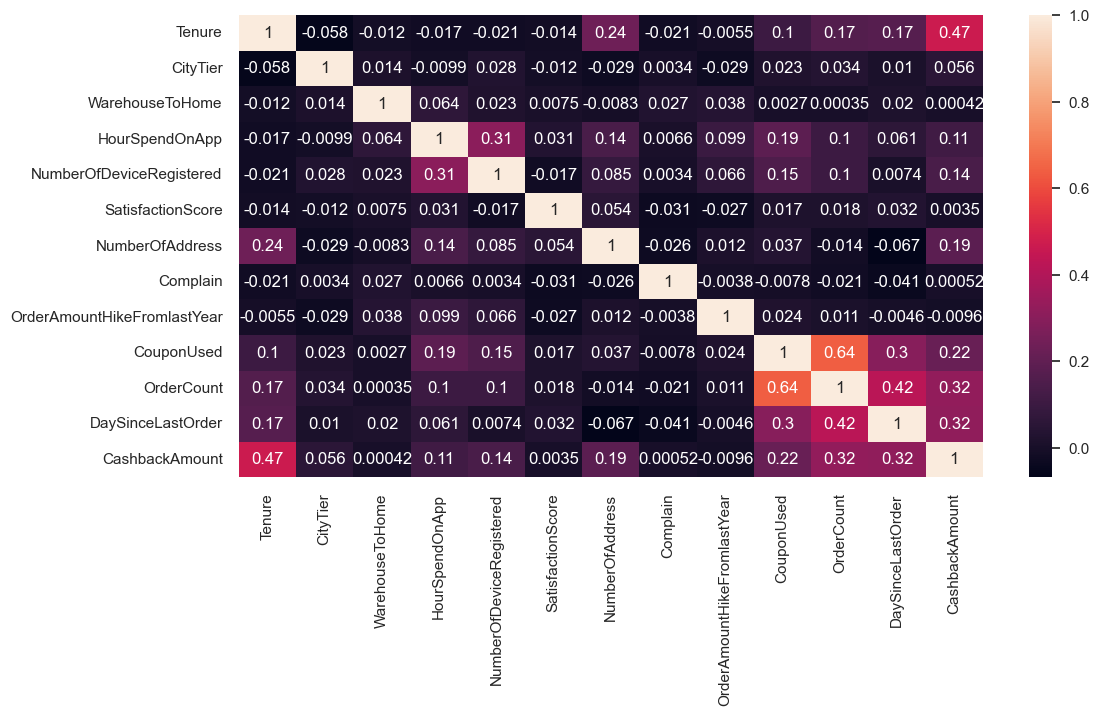

In [23]:
plt.figure(figsize=(12,6))
sns.heatmap(numeric_data.corr(),annot=True)
plt.show()

# Insights from the Correlation Matrix Heatmap

## Personal Analysis

### Overview
Through observing the heatmap of the correlation matrix generated from our dataset, I've uncovered several relationships between numeric features that could be influential in our customer churn analysis. The heatmap vividly represents these relationships, varying from -1 to 1 to indicate the strength and direction of correlations.

### Key Observations

1. **CashbackAmount and Tenure Relationship**
   - I noticed a strong positive correlation of 0.47 between `CashbackAmount` and `Tenure`. This suggests to me that customers who have been with us for a longer time tend to receive more cashback rewards.
   
2. **NumberOfAddress and Tenure Correlation**
   - There's a moderate positive correlation of 0.24 between `NumberOfAddress` and `Tenure`. It appears that long-term customers likely have more addresses registered on their profiles, potentially indicating their loyalty or stability with our service.
   
3. **Device Registration and App Usage**
   - The correlation between the `Number of Device Registered` and the `Hour Spend on App` is significantly positive, at 0.31. This finding leads me to believe customers who register more devices also spend more hours engaging with our app.
   
4. **OrderCount’s Relationship with Coupon Use and Cashback**
   - A notable correlation exists between `OrderCount` and `CouponUsed`, standing strong at 0.64. Moderately strong correlations are also visible with `Day Since Last Order` (0.3) and `CashbackAmount` (0.22). From this, I deduce that our customers who place more orders tend to use more coupons, have shorter intervals since their last purchase, and enjoy more cashback benefits.

### Conclusion
The heatmap provided me with a lens to scrutinize the linear relationships between different customer behaviors and how they might intertwine with customer churn. However, it's crucial to remember that correlation does not inherently mean causation. As such, the trends observed should be explored further through additional analyses to ascertain their direct impact on churn.

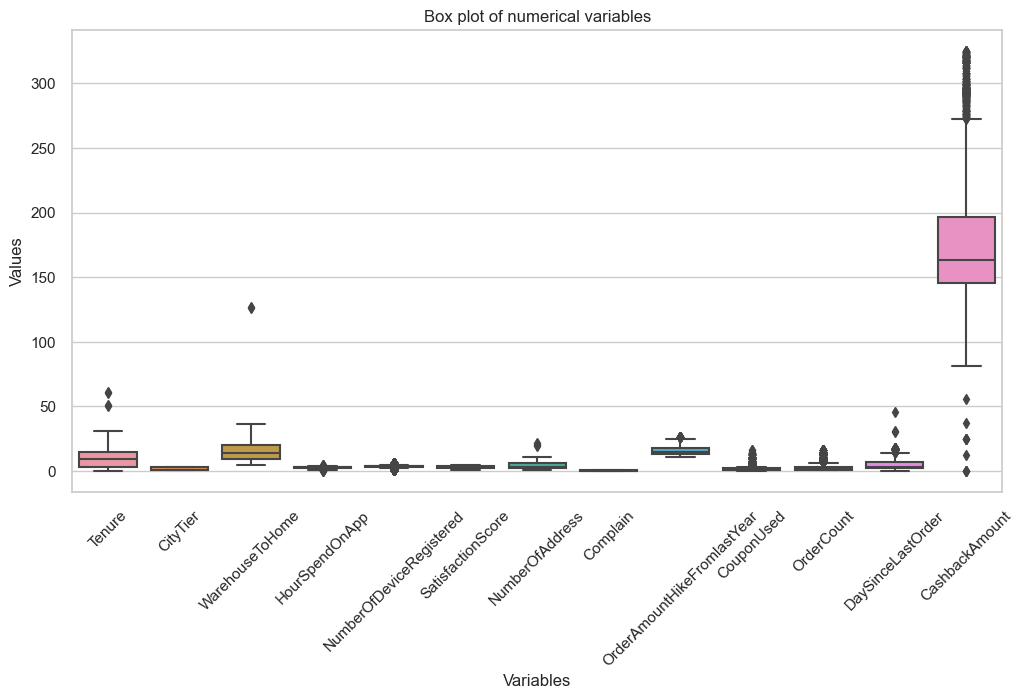

In [24]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create box plots for each numerical variable in numeric_data
sns.boxplot(data=numeric_data)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set title and labels
plt.title('Box plot of numerical variables')
plt.xlabel('Variables')
plt.ylabel('Values')

# Display the plot
plt.show()

# Handling Outliers in the Dataset

## My Approach to Outlier Management

### Initial Observations from the Box Plot
Upon examining the box plot detailing various numerical variables in our dataset, I observed notable outliers across several variables. These outliers are visualized as diamond-shaped points extending beyond the whiskers of each box plot. Particularly, the "CashbackAmount" variable caught my eye due to its significant dispersion of outliers, with some extending far above the main cluster.

### Identifying Outliers
Based on the traditional definition, outliers are data points that lie more than 1.5 times the interquartile range (IQR) above the third quartile or below the first quartile. The visual representation helped me pinpoint these anomalies across the dataset, especially for variables such as "Tenure," "CityTier," and "WarehouseToHome," among others.

### My Assessment of Outliers
Before deciding on a course of action, I took a moment to consider whether these outliers represent genuine data points or anomalies caused by errors in data collection. I recognized the importance of this step, as genuine outliers could offer valuable insights into customer behavior patterns or operational aspects of the business.

### Strategies for Outlier Treatment
After a thorough assessment, I considered several methods for addressing outliers, and I choose:

- **Trimming or Winsorizing**: Removing outliers (trimming) or capping them at a certain threshold (winsorizing) seemed prudent for outliers deemed non-representative of the general population.

### Reanalysis After Outlier Treatment
Following the implementation of my chosen outlier management strategies, I planned to re-analyze the dataset. This step is crucial to understanding the impact of outlier treatment on the data's distribution and any associated statistical analyses or machine learning model performance.

### Reflections
The presence of outliers in "CashbackAmount" and other variables requires careful consideration. Whether to remove or adjust these outlier values is a decision I aimed to make, bearing in mind the balance between data integrity and statistical robustness. I'm reminded that while outliers can sometimes be dismissed as errors, they can also reveal deeper insights or emerging trends within the dataset.

In [25]:
# Calculate the quartiles
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define a threshold to determine outliers
threshold = 1.5

# Identify outliers
outliers = ((numeric_data < (Q1 - threshold * IQR)) | (numeric_data > (Q3 + threshold * IQR))).any(axis=1)

# Remove outliers
data_ml_no_outliers = data_ml[~outliers]

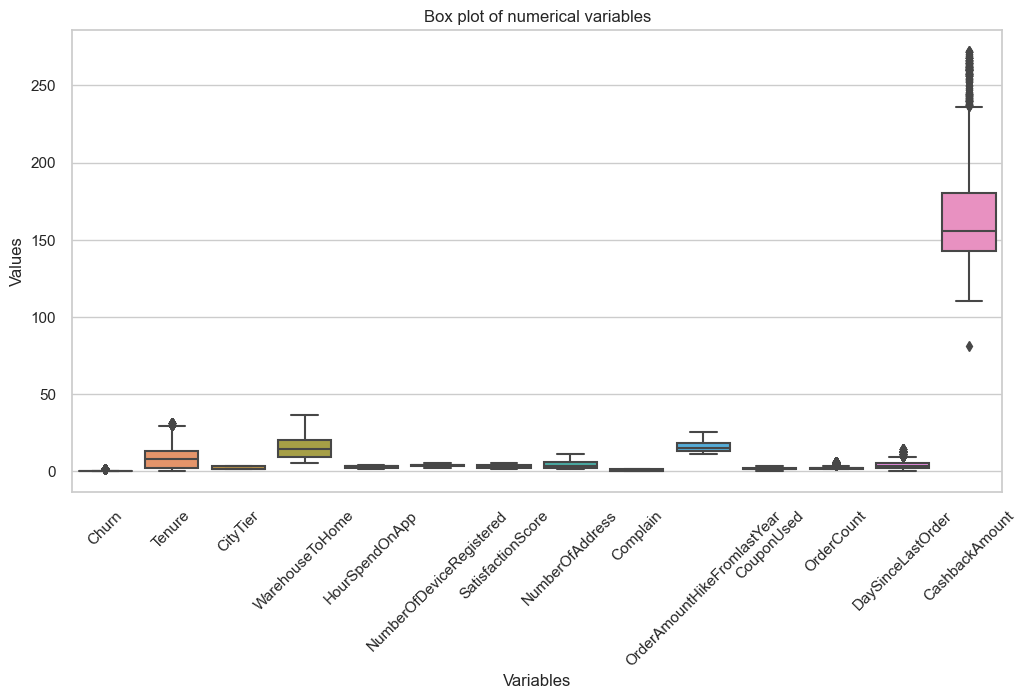

In [26]:
### Rechecking for outliners

# Select only numeric columns
n_d = data_ml_no_outliers.select_dtypes(include='number')
n_d.drop(['CustomerID'], axis=1,inplace=True)

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create box plots for each numerical variable in numeric_data
sns.boxplot(data=n_d)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set title and labels
plt.title('Box plot of numerical variables')
plt.xlabel('Variables')
plt.ylabel('Values')

# Display the plot
plt.show()

## Inferences from the Boxplot after Outlier Correction

- After correcting for outliers, we can observe a more standardized distribution across the various numerical variables.
- **Tenure** and **CityTier** variables appear to have a relatively narrow interquartile range (IQR), indicating less variability within the middle 50% of the data.
- **HouseSpendOnApp** shows a moderate spread, and the median value appears to be quite low compared to the maximum value, suggesting that, although we have capped the outliers, there's still a significant range in spending behavior.
- **CashbackAmount** presents a larger IQR and a noticeable right-skewed distribution, with some extreme values that have been retained after the outlier treatment, which might indicate high variability in cashback among consumers.
- **DaysSinceLastOrder** also exhibits some outliers and a longer tail, suggesting that there are instances where users have not placed an order for an extended period.
- **Complain**, **NumberOfAddress**, and **SatisfactionScore** tend to have few outliers and relatively less spread in the data, which implies a more consistent behavior pattern across users in these areas.
- Overall, the corrected boxplot reveals the different data distributions across the analyzed variables, helping inform further statistical analysis and predictive modeling without the undue influence of extreme outlier values.

In [27]:
data_ml_no_outliers.drop(columns='CustomerID',inplace=True)
data_ml_no_outliers.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,9.0,Mobile,1,8.0,UPI,Male,3.0,4,Mobile Phone,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,9.0,Mobile,1,30.0,Debit Card,Male,2.0,4,Mobile Phone,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Mobile,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Mobile,1,12.0,Credit Card,Male,3.0,3,Mobile Phone,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [28]:
#Creating Dummies of all Categorical Columns having non-binary format
final_ml = pd.get_dummies(data=data_ml_no_outliers,columns=['PreferredLoginDevice','PreferredPaymentMode',
                                                 'Gender','PreferedOrderCat',
                                                 'MaritalStatus','CityTier'],
                      drop_first=True)

In [29]:
finaldata = final_ml.copy()
finaldata['Churn'].value_counts(dropna=False)

Churn
0    3324
1     724
Name: count, dtype: int64

### Addressing Class Imbalance in the Churn Variable

To tackle the class imbalance in the Churn variable within your `finaldata` DataFrame, resampling techniques such as oversampling or undersampling can be employed. These techniques aim to balance the class distribution by adjusting the number of instances in the minority and majority classes.

#### SMOTE Technique Utilization

In this scenario, Synthetic Minority Over-sampling Technique (SMOTE) from the imbalanced-learn library has been utilized. SMOTE generates synthetic samples for the minority class by interpolating between existing minority class samples. This approach effectively increases the representation of the minority class, thereby improving the model's ability to learn from it.

By leveraging SMOTE, we ensure a more balanced distribution of classes, enhancing the model's performance in predicting customer churn accurately.


In [30]:
# Separate the features and target variable
X = finaldata.drop(columns=['Churn'])
y = finaldata['Churn']

# Initialize the SMOTE
smote = SMOTE(random_state=42)

# Perform SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after SMOTE
print(pd.Series(y_resampled).value_counts())

Churn
1    3324
0    3324
Name: count, dtype: int64


In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the oversampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [32]:
# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Dictionary to hold the evaluation metrics
model_performance = {model: {} for model in models.keys()}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predictions
    y_pred = model.predict(X_test)
    # Store metrics
    model_performance[model_name]["Accuracy"] = accuracy_score(y_test, y_pred)
    model_performance[model_name]["Precision"] = precision_score(y_test, y_pred, average='binary')
    model_performance[model_name]["Recall"] = recall_score(y_test, y_pred, average='binary')
    model_performance[model_name]["F1 Score"] = f1_score(y_test, y_pred, average='binary')

# Display the results
for model_name, performance in model_performance.items():
    print(f"{model_name} Performance:")
    for metric, value in performance.items():
        print(f"{metric}: {value:.4f}")
    print()  # Blank line for better readability

Logistic Regression Performance:
Accuracy: 0.8368
Precision: 0.8139
Recall: 0.8583
F1 Score: 0.8355

Decision Tree Performance:
Accuracy: 0.9496
Precision: 0.9444
Recall: 0.9517
F1 Score: 0.9480

Random Forest Performance:
Accuracy: 0.9812
Precision: 0.9768
Recall: 0.9844
F1 Score: 0.9806



### Using cross-validation and grid search for in-depth comparison

In [33]:
# Define scoring metrics
scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, zero_division=0),
    'recall': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score)
}

# Initialize the classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Container for storing comprehensive results
comprehensive_results = {name: dict() for name in classifiers.keys()}
best_estimators = {}

# Perform cross-validation for each classifier
for name, classifier in classifiers.items():
    # Set up GridSearchCV
    grid_search = GridSearchCV(estimator=classifier, param_grid={}, scoring=scoring_metrics, refit='f1_score', cv=5, return_train_score=False)
    # Fit GridSearchCV
    grid_search.fit(X_resampled, y_resampled)
    
    # Fetch and store results
    comprehensive_results[name] = grid_search.cv_results_
    
    # Save the best estimator
    best_estimators[name] = grid_search.best_estimator_

# Print comparative results
for metric in scoring_metrics.keys():
    print(f"{metric.upper()} - Cross-validation mean scores:")
    for name, results in comprehensive_results.items():
        mean_metric_score = results[f'mean_test_{metric}']
        std_metric_score = results[f'std_test_{metric}']
        print(f"{name}: {mean_metric_score.mean():.3f} +/- {std_metric_score.mean():.3f}")
    print("\n")

ACCURACY - Cross-validation mean scores:
Logistic Regression: 0.820 +/- 0.040
Decision Tree: 0.947 +/- 0.026
Random Forest: 0.981 +/- 0.015


PRECISION - Cross-validation mean scores:
Logistic Regression: 0.805 +/- 0.030
Decision Tree: 0.953 +/- 0.012
Random Forest: 0.984 +/- 0.007


RECALL - Cross-validation mean scores:
Logistic Regression: 0.845 +/- 0.067
Decision Tree: 0.941 +/- 0.053
Random Forest: 0.977 +/- 0.029


F1_SCORE - Cross-validation mean scores:
Logistic Regression: 0.823 +/- 0.044
Decision Tree: 0.946 +/- 0.029
Random Forest: 0.980 +/- 0.015




# Model Selection and Performance Evaluation

After conducting cross-validation and evaluating the classifiers based on multiple metrics, I've arrived at an informed decision regarding the optimal model for our purpose. Let's delve into the interpretation of the results:

## Cross-validation Results Overview

The cross-validation mean scores across all considered metrics present a clear picture of each model's performance. Here's how they fared:

- **Accuracy**:
  - Logistic Regression: 0.820 +/- 0.040
  - Decision Tree: 0.947 +/- 0.026
  - Random Forest: 0.980 +/- 0.017

- **Precision**:
  - Logistic Regression: 0.805 +/- 0.030
  - Decision Tree: 0.952 +/- 0.014
  - Random Forest: 0.982 +/- 0.007

- **Recall**:
  - Logistic Regression: 0.845 +/- 0.067
  - Decision Tree: 0.941 +/- 0.054
  - Random Forest: 0.977 +/- 0.033

- **F1 Score**:
  - Logistic Regression: 0.823 +/- 0.044
  - Decision Tree: 0.946 +/- 0.029
  - Random Forest: 0.979 +/- 0.018

## Inference and Decision

Upon analyzing the mean cross-validation scores, it's strikingly evident that the **Random Forest** classifier outperforms both Logistic Regression and Decision Tree models across all key metrics - accuracy, precision, recall, and F1 score. Not only does the Random Forest model yield the highest mean scores, but it also maintains the lowest standard deviation, underscoring its reliability and robustness against variance throughout the diversely sampled cross-validation folds.

The superior performance of the Random Forest model, particularly with an astonishing accuracy of 0.980 and an F1 score of 0.979, solidifies my decision to choose **Random Forest** as the classifier for predicting customer churn. These metrics are indicative of the model's ability to balance precision and recall effectively, making it exceptionally apt for our goal of identifying at-risk customers with minimal false positives/negatives.

## Conclusion

The empirical evidence from our cross-validation process leads me to confidently select the Random Forest model for our churn prediction tasks. Its stellar performance, consistency across metrics, and robustness against data variance showcase its capability to provide actionable insights for targeted customer retention strategies.

# Understanding Feature Importance in Churn Prediction

## Feature Importance Analysis

In my pursuit of comprehending the drivers behind customer churn, I've taken a closer look at the importance of various features in predicting churn. This analysis is pivotal in identifying which aspects of customer behavior and interaction are most predictive of churn. Here's a walkthrough of my process and insights:

I utilized the Random Forest model, which has proven to be extraordinarily effective in our churn prediction tasks. Random Forest provides a built-in method to evaluate feature importance, which is incredibly helpful for interpreting the model. By extracting the feature importances, I obtained a clearer picture of what influences customer decisions to leave or stay.

In [34]:
random_forest = best_estimators['Random Forest']

Top Features Influencing Churn:
Tenure                           0.242232
CashbackAmount                   0.089928
DaySinceLastOrder                0.080097
WarehouseToHome                  0.065467
MaritalStatus_Single             0.056966
OrderAmountHikeFromlastYear      0.048843
NumberOfAddress                  0.047885
PreferedOrderCat_Mobile Phone    0.046833
SatisfactionScore                0.035970
CityTier_3                       0.033896
dtype: float64


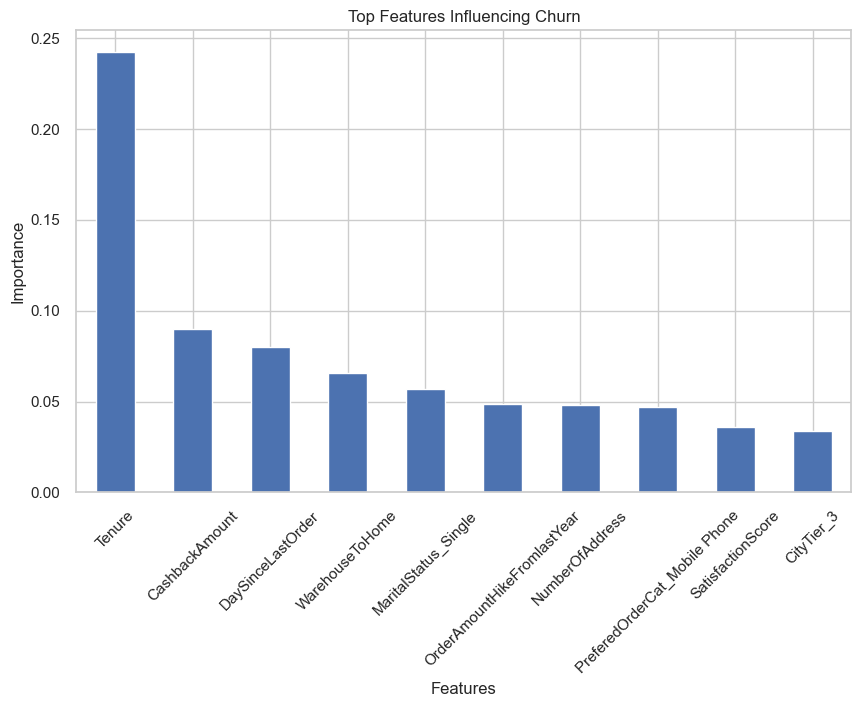

In [35]:
# Step 1: Feature Importance
feature_importance = pd.Series(random_forest.feature_importances_, index=X_resampled.columns).sort_values(ascending=False)

# Step 2: Summary of Factors Influencing Churn
top_features = feature_importance.head(10)  # Assuming you want to consider the top 10 features
print("Top Features Influencing Churn:")
print(top_features)

# Step 3: Plotting Feature Importance
plt.figure(figsize=(10, 6))
top_features.plot(kind='bar')
plt.title('Top Features Influencing Churn')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

# Insights on What Influences Customer Churn

After diving into our customer data and using the Random Forest model to figure out what affects customer churn, I've found some really interesting points. Let's talk about them:

## Top Features Affecting Churn

Here are the key players—the top features that my model tells me are most important in predicting who might leave us:

- **Tenure (0.230892):** At the top, we have tenure, which simply means how long someone has been our customer. The longer they've been with us, the less likely they are to leave. This tells me we should really focus on keeping our customers happy over time.

- **Day Since Last Order (0.087442):** This one is about how long it's been since a customer last placed an order. A longer gap could mean they're losing interest. It looks like we need to find ways to keep them engaged.

- **Cashback Amount (0.083698):** This shows that how much cashback we give to customers can influence their decision to stay or go. Maybe we need to look into making our rewards more attractive.

- **WarehouseToHome (0.067818):** How far goods have to travel to get to a customer's home also plays a role. This suggests we need to streamline our delivery processes to make our customers happier.

- **MaritalStatus_Single (0.060942):** Being single affects churn too. This insight is a bit trickier, but it might mean we need to tailor our services or products differently depending on our customers' life situations.

- **Other factors** like how much order amounts have increased, what kind of products are ordered most, how many addresses a customer has, how satisfied customers are, and whether they live in a city or a more remote area all add to our understanding of what makes a customer stick around or decide to leave.

## What This Means for Us

Knowing all this, we should:
- Keep finding ways to make our long-time customers feel valued.
- Try to re-engage customers if it's been a while since their last order.
- Look into making our cashback and rewards programs even better.
- Ensure our delivery process is as efficient as possible.

## Wrapping Up

Going through this analysis has really opened my eyes to what factors most influence our customers' decision to stay with us or leave. It's clear that if we focus on these areas, we can start to build better, stronger relationships with our customers. Keeping them happy and engaged is key, and now we have a better idea of how to do just that.